# 3.0 Results

## 3.1 Cross Validation of Augmented Dataset

In [4]:
import pandas as pd

raw_data = pd.read_csv("data/training-selected/all/pose_data_raw.csv")
raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels 
raw_data.drop('label_encoded', axis=1, inplace=True)
raw_data.insert(3, 'label_encoded', labels)

transformed_data = pd.read_csv("data/training-selected/all/pose_data_augmented_z_res_0301.csv")

rdata_features = raw_data.iloc[:,4:103]
rdata_labels = raw_data['label_encoded'].values
tdata_features = pd.concat([transformed_data.iloc[:, 6:9], transformed_data.iloc[:, 39:93], transformed_data.iloc[:, 114:]], axis=1)
tdata_labels = transformed_data['label_encoded'].values

In [5]:
tdata_features

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_11_x,landmark_11_y,landmark_11_z,landmark_12_x,landmark_12_y,landmark_12_z,landmark_13_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.444102,0.627645,-0.457313,0.544089,0.578087,0.037718,0.417130,0.535374,-0.195321,0.654106,...,0.4071,0.4453,0.2270,149.7455,30.2545,96.2236,137.7378,64.5253,125.8498,73.6329
1,0.516767,0.627645,-0.373248,0.529274,0.578087,0.131625,0.444710,0.535374,-0.119920,0.645588,...,0.4071,0.4453,0.2270,149.7455,30.2545,96.2236,137.7378,64.5253,125.8498,73.6329
2,0.573730,0.627645,-0.277842,0.498377,0.578087,0.221533,0.458778,0.535374,-0.040875,0.617453,...,0.4071,0.4453,0.2270,149.7455,30.2545,96.2236,137.7378,64.5253,125.8498,73.6329
3,0.613260,0.627645,-0.173994,0.452336,0.578087,0.304709,0.458906,0.535374,0.039412,0.570557,...,0.4071,0.4453,0.2270,149.7455,30.2545,96.2236,137.7378,64.5253,125.8498,73.6329
4,0.634157,0.627645,-0.064859,0.392552,0.578087,0.378627,0.445090,0.535374,0.118502,0.506326,...,0.4071,0.4453,0.2270,149.7455,30.2545,96.2236,137.7378,64.5253,125.8498,73.6329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,0.113107,0.444561,-0.761474,0.219795,0.444288,-0.582408,0.296830,0.541557,-0.555583,0.155749,...,0.0949,0.4344,0.7478,47.5918,132.4082,139.5484,141.6383,156.0463,152.2347,155.7035
10220,0.243617,0.444561,-0.730265,0.317590,0.444288,-0.535393,0.388797,0.541557,-0.495599,0.244784,...,0.0949,0.4344,0.7478,47.5918,132.4082,139.5484,141.6383,156.0463,152.2347,155.7035
10221,0.366725,0.444561,-0.676867,0.405735,0.444288,-0.472110,0.468950,0.541557,-0.420556,0.326382,...,0.0949,0.4344,0.7478,47.5918,132.4082,139.5484,141.6383,156.0463,152.2347,155.7035
10222,0.478690,0.444561,-0.602902,0.481552,0.444288,-0.394482,0.534854,0.541557,-0.332734,0.398063,...,0.0949,0.4344,0.7478,47.5918,132.4082,139.5484,141.6383,156.0463,152.2347,155.7035


<Axes: >

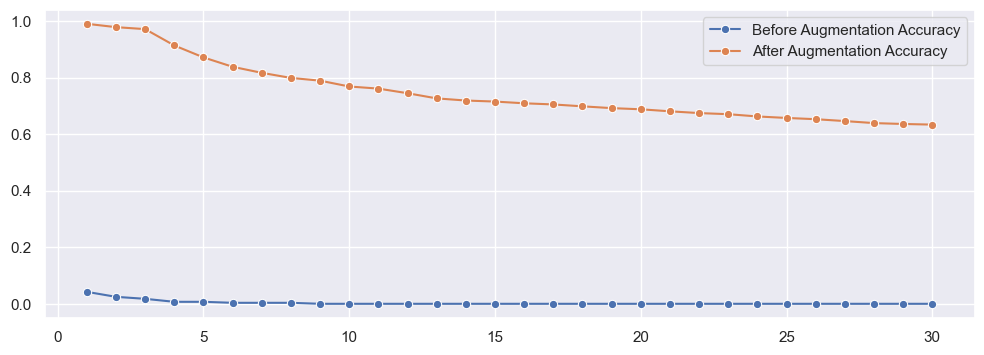

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut


scaler = StandardScaler()
X1 = scaler.fit_transform(rdata_features)
X2 = scaler.fit_transform(tdata_features)
y1 = rdata_labels
y2 = tdata_labels
k_values = [i for i in range(1, 31)]

scores_v1 = []
scores_v2 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score_v1 = cross_val_score(knn, X1, y1, cv=LeaveOneOut(), scoring='accuracy')
    score_v2 = cross_val_score(knn, X2, y2, cv=15, scoring='accuracy')
    scores_v1.append(np.mean(score_v1))
    scores_v2.append(np.mean(score_v2))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_v1, marker = 'o', label='Before Augmentation Accuracy')
sns.lineplot(x = k_values, y = scores_v2, marker = 'o', label='After Augmentation Accuracy')